<a href="https://colab.research.google.com/github/Nikhil199727/Chrun-Modelling/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [ ]:
df_churn = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df_churn.head( )

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df_churn.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df_churn.duplicated().sum()

0

In [ ]:
churn_rate = df_churn['Exited'].mean() * 100

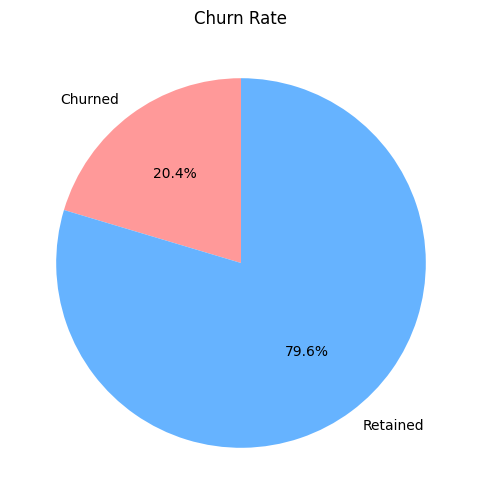

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([churn_rate, 100 - churn_rate], labels=['Churned', 'Retained'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Churn Rate')
plt.show()

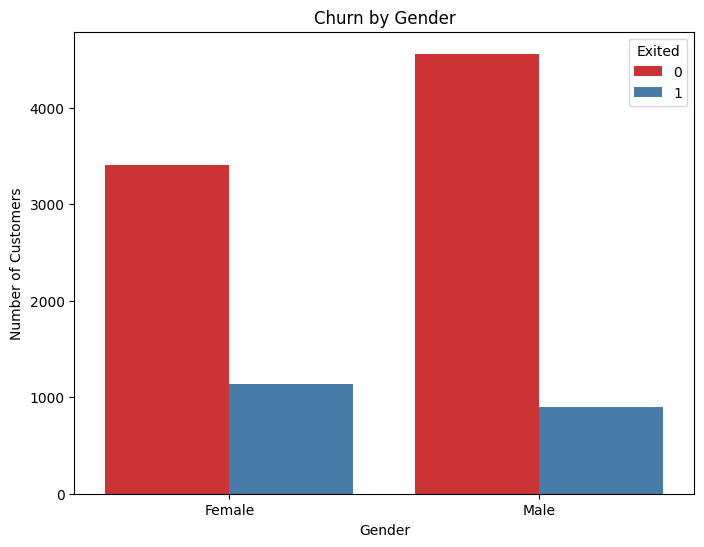

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df_churn, palette='Set1')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

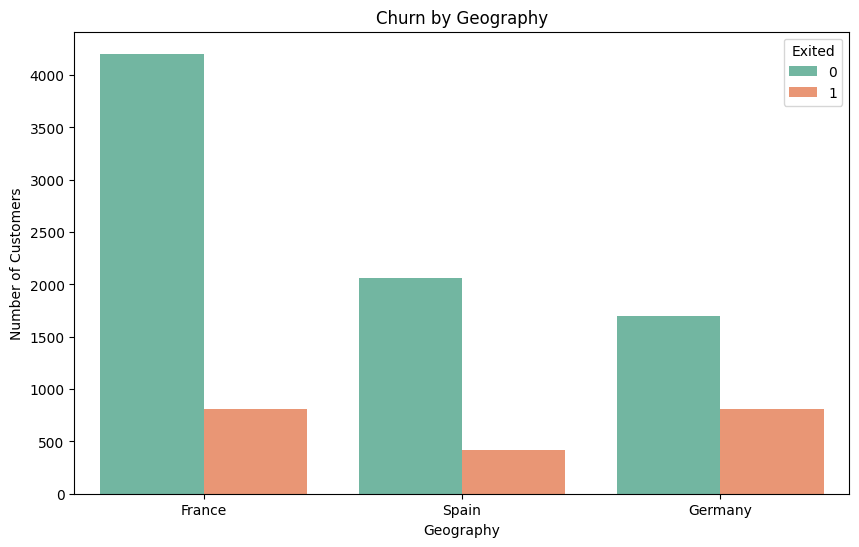

In [ ]:
# Plot churn by geography
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=df_churn, palette='Set2')
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

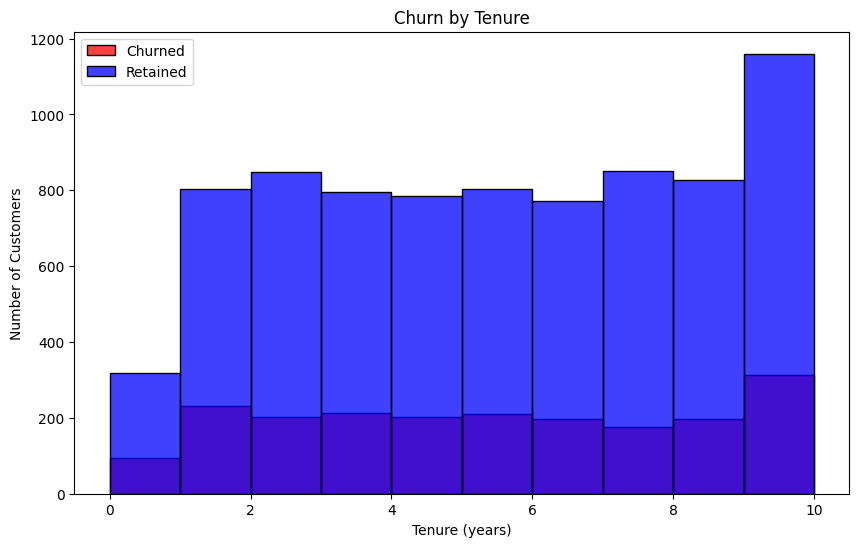

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_churn[df_churn['Exited'] == 1]['Tenure'], bins=10, kde=False, color='red', label='Churned')
sns.histplot(df_churn[df_churn['Exited'] == 0]['Tenure'], bins=10, kde=False, color='blue', label='Retained')
plt.title('Churn by Tenure')
plt.xlabel('Tenure (years)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

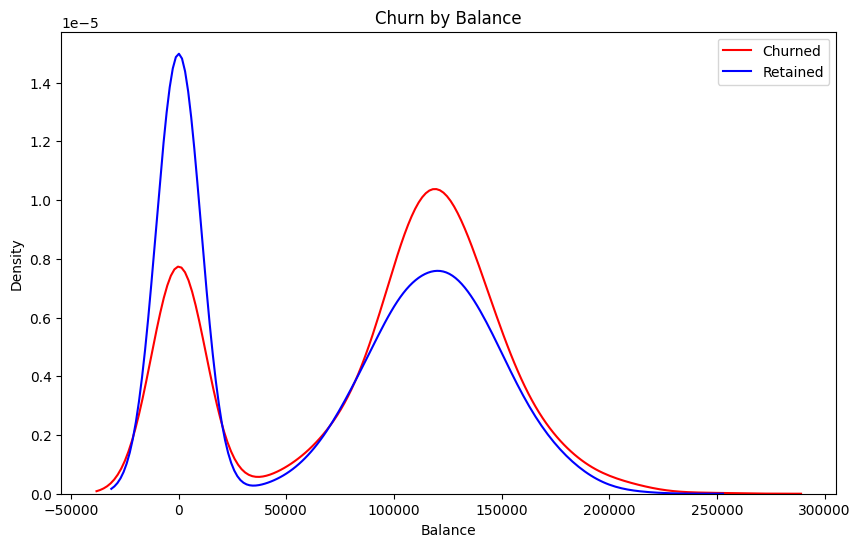

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_churn[df_churn['Exited'] == 1]['Balance'], color='red', label='Churned')
sns.kdeplot(df_churn[df_churn['Exited'] == 0]['Balance'], color='blue', label='Retained')
plt.title('Churn by Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()

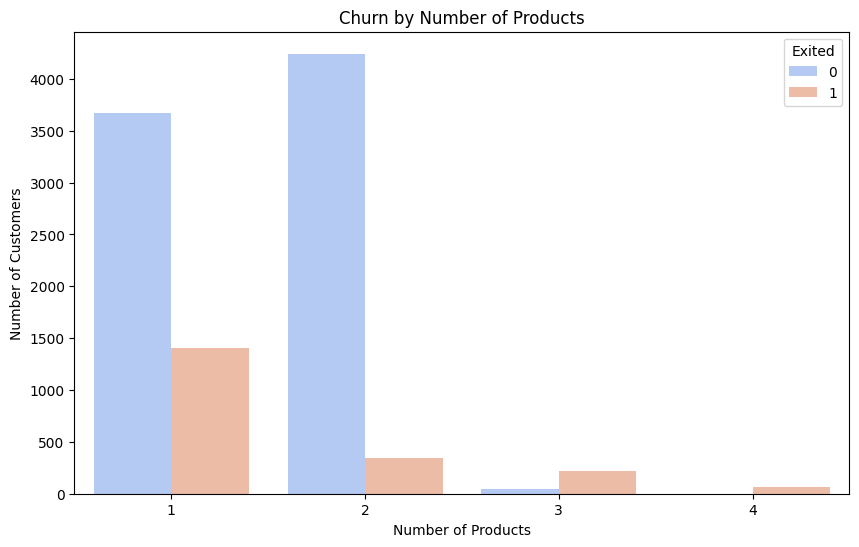

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df_churn, palette='coolwarm')
plt.title('Churn by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.show()

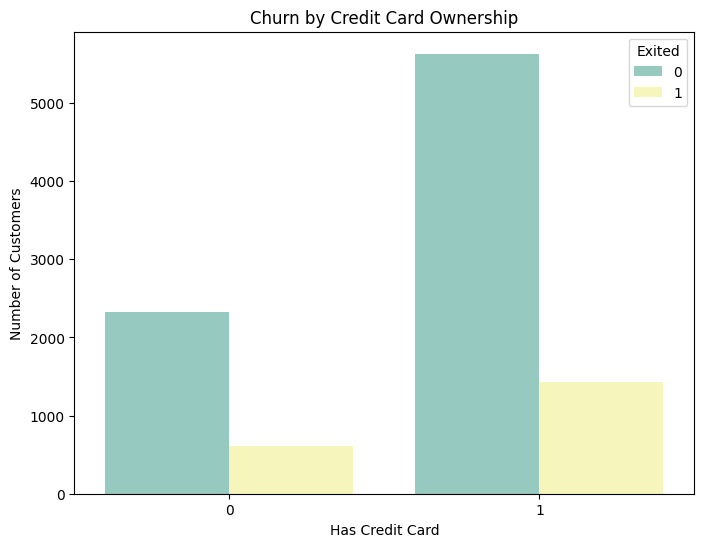

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df_churn, palette='Set3')
plt.title('Churn by Credit Card Ownership')
plt.xlabel('Has Credit Card')
plt.ylabel('Number of Customers')
plt.show()

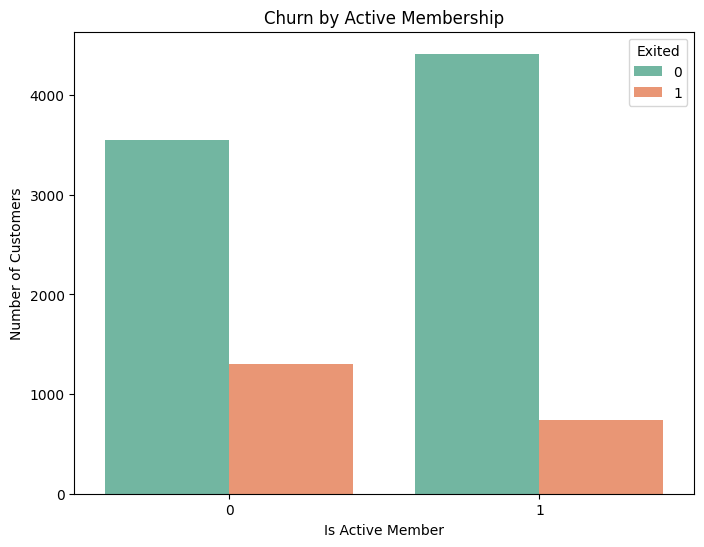

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df_churn, palette='Set2')
plt.title('Churn by Active Membership')
plt.xlabel('Is Active Member')
plt.ylabel('Number of Customers')
plt.show()

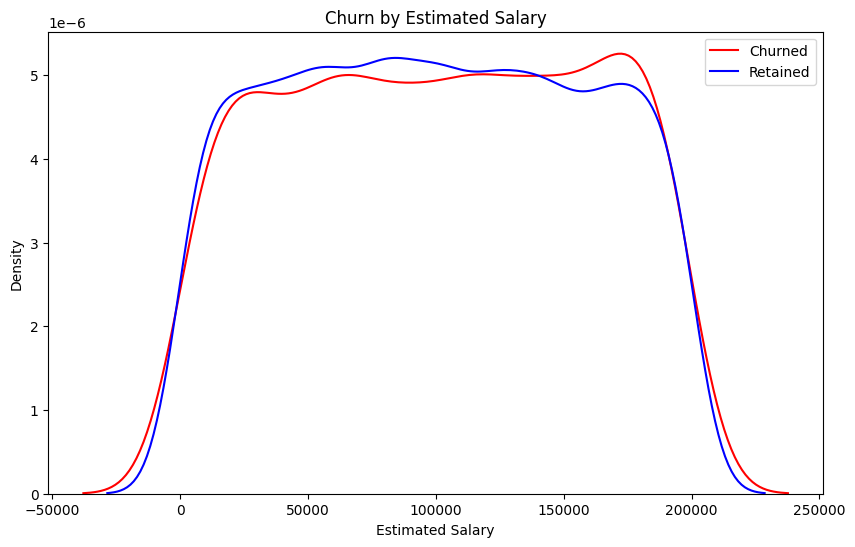

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_churn[df_churn['Exited'] == 1]['EstimatedSalary'], color='red', label='Churned')
sns.kdeplot(df_churn[df_churn['Exited'] == 0]['EstimatedSalary'], color='blue', label='Retained')
plt.title('Churn by Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
df = df_churn.copy()


label_encoder_geography = LabelEncoder()
df['Geography'] = label_encoder_geography.fit_transform(df['Geography'])

label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])


X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)


y_pred_logreg = logreg.predict(X_test)


print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Results:
Accuracy: 0.815
Confusion Matrix:
 [[1559   48]
 [ 322   71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Results:
Accuracy: 0.8645
Confusion Matrix:
 [[1545   62]
 [ 209  184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



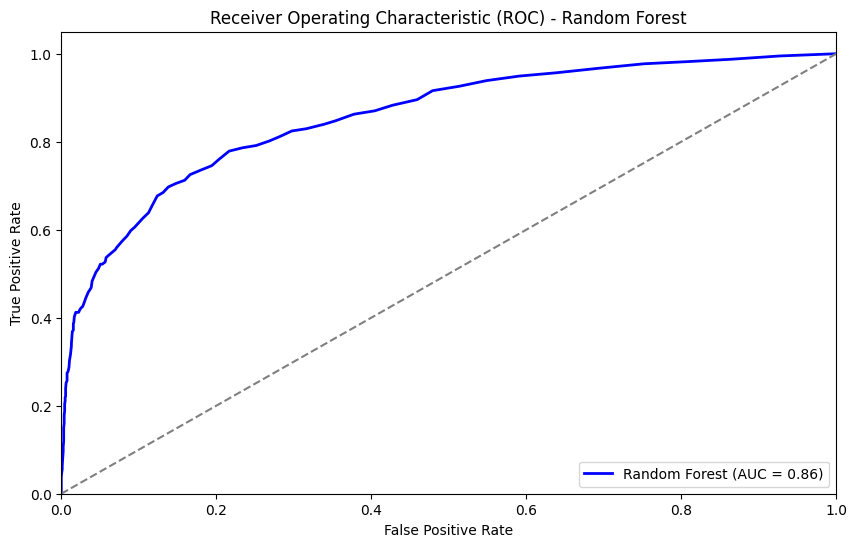

In [ ]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()